In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import networkx as nx

## Create Chain Graph

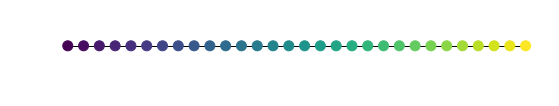

In [2]:
N = 30
G = nx.path_graph(N)
pos = {i: (i, 0) for i in range(N)}
plt.figure(figsize=(7, 1))
nx.draw(G, pos, node_color=range(N), node_size=100)

## Sparse Laplacian Function

In [3]:
def get_laplacian(G):
    A = scipy.sparse.lil_matrix((N, N), dtype=np.float32)
    D = np.zeros((N), dtype=np.float32)
    for e in G.edges():
        i = np.dot(e[0], (1))
        j = np.dot(e[1], (1))
        A[i, j] = A[j, i] = 1
        D[i] += 1
        D[j] += 1
    return np.diag(D) - A

## Get Eigen Vectors

In [4]:
laplacian = get_laplacian(G)
_, eigvec = scipy.sparse.linalg.eigsh(laplacian, k=20, which="SM")

## Plot top 20 Eigen Vectors onto Chain Graph

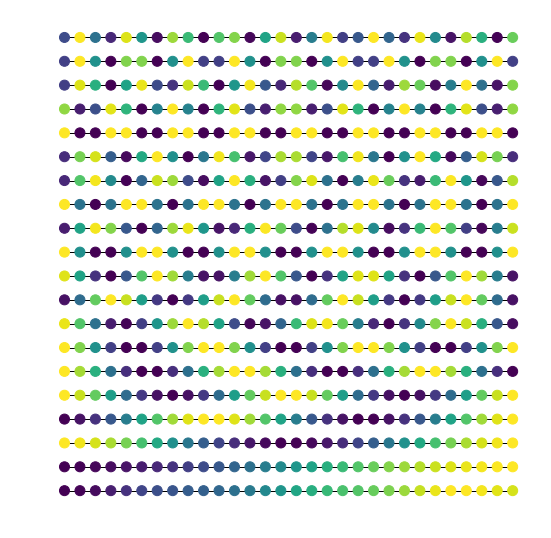

In [5]:
plt.figure(figsize=(7, 7))
for i in range(20):
    G = nx.path_graph(N)
    pos = {j: (j, i) for j in range(N)}
    nx.draw(G, pos, node_color=eigvec[:, i] , node_size=100)
plt.show()